<a href="https://colab.research.google.com/github/urfa10/MSIB_Data-Science/blob/main/MSIB_Studi_Kasus_Asosiasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Awal

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/DataSource/data_retail2.xlsx'
data = pd.read_excel(url)

In [ ]:
# data retail
df = pd.DataFrame(data)
df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


# Business Understanding

- Objective : Mencari pola hubungan antara satu atau lebih item dalam suatu dataset untuk membantu retailer dalam menentukan product bundling dan product placement dari data transaksi yang akan digunakan.
- Algoritma : Algoritma Apriori
- Dataset : OnlineRetail

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.

# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            541909 non-null  object        
 1   InvoiceDate          541909 non-null  datetime64[ns]
 2   BRANCH_SPLR          541909 non-null  int64         
 3   BRANCHNAME_SPLR      541909 non-null  object        
 4   warehouseProductsID  541909 non-null  object        
 5   BARCODEID            541909 non-null  int64         
 6   StockCode            541909 non-null  object        
 7   PRODUCT              541909 non-null  object        
 8   PRODUCT_CATEGORY     541909 non-null  object        
 9   Quantity             541909 non-null  int64         
 10  UnitPrice            541909 non-null  float64       
 11  UnitPriceRupiah      541909 non-null  float64       
 12  oldCUSTID            541909 non-null  object        
 13  CustomerID    

In [ ]:
df['PROVINSI'].value_counts()

JAWA TENGAH            138644
JAWA TIMUR              95089
JAWA BARAT              83588
KAL-SEL                 21452
KEPULAUAN RIAU          18400
BALI                    17508
BANTEN                  15232
KALIMANTAN TIMUR        13860
DI YOGYAKARTA           13496
Jawa Tengah             13176
NUSA TENGGARA BARAT      8576
Jawa timur               7528
JAWA TENGAH              6636
SULAWESI SELATAN         6428
Kalimantan Timur         6424
LAMPUNG                  6280
DIY                      5740
Sumatera Selatan         5592
RIAU                     5476
KALTENG                  5244
SUMATERA UTARA           5200
SULAWESI UTARA           4648
SUMATERA BARAT           4256
SUMATERA SELATAN         4064
KALIMANTAN SELATAN       3532
KALIMANTAN TENGAH        3432
JAWATENGAH               2956
SULAWESI TENGGARA        2076
SULAWESI TENGAH          1480
KALIMANTAN BARAT          480
KAL-BAR                   320
JAMBI                     148
BANGKA BELITUNG            64
Jawa Barat

In [ ]:
df.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,541909.000000,5.419090e+05,541909.000000,541909.000000,5.419090e+05,406829.000000,541909.000000,541909.000000
mean,25.762779,8.144577e+12,9.552250,4.611114,6.593892e+04,15287.690570,36.072115,261119.832586
std,12.696276,5.977482e+12,218.081158,96.759853,1.383666e+06,1713.600303,9.862746,129491.622938
min,1.000000,1.000000e+00,-80995.000000,-11062.060000,-1.581875e+08,12346.000000,14.000000,10209.000000
25%,14.000000,8.888036e+12,1.000000,1.250000,1.787500e+04,13953.000000,32.000000,140223.000000
50%,28.000000,8.992920e+12,3.000000,2.080000,2.974400e+04,15152.000000,32.000000,280305.000000
75%,36.000000,8.998103e+12,10.000000,4.130000,5.905900e+04,16791.000000,41.000000,380109.000000
max,45.000000,8.999999e+14,80995.000000,38970.000000,5.572710e+08,18287.000000,93.000000,450202.000000


Hasil Analisis :
1. Dari data tersebut mencakup 541.909 raw data yang mana sama dengan jumlah count suplier
2. Jumlah provinsi mencakup 34 provinsi
3. Sebaran setiap branch/suplier dan juga provinsi menunjukkan sebaran data yang berbeda (ct : Populasi Jakarta dengan Kalimantan secara kasar berbeda). Secara data terlihat tidak seimbang.
4. Sehingga analisis harus dipisahkan berdasarkan branch/provinsi untuk memberikan suggest produk kombinasi atau produk placement
5. Membutuhkan transpose data untuk membentuk data yg ready untuk proses asosiasi

# Data Preparation

## Remove spaces at the beginning and at the end of the string

In [ ]:
df['PRODUCT'] = df['PRODUCT'].str.strip()

In [ ]:
df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.strip()

## Remove rows with missing values
menghapus nol value yang absisnya 0 (baris pertama kolom pertama) hanya mengsubsetkan

In [ ]:
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

Jadi, jika ada baris di DataFrame df yang memiliki nilai yang hilang pada kolom 'InvoiceNo', baris tersebut akan dihapus. Kode tersebut memodifikasi DataFrame df secara langsung karena inplace diatur sebagai True, sehingga perubahan diterapkan langsung pada DataFrame df

## Menghapus variabel InvoiceNo yang diawali dengan huruf C

In [ ]:
df['InvoiceNo']=df['InvoiceNo'].astype(str)
df=df[~(df['InvoiceNo'].str[0]=='C')]

# Modeling

## Transformasi Data

In [ ]:
basket=(df[df['PROVINSI']=='JAWA TENGAH'].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
              .unstack().reset_index().fillna(0)\
              .set_index('InvoiceNo')
        )

basket.head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
basket

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1,0,2,13,4 = kuantitatif


In [ ]:
basket.tail(10)

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
575893,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
575894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
575895,0.0,3.0,0.0,0.0,4.0,3.0,2.0,13.0,0.0,0.0,...,0.0,0.0,4.0,2.0,5.0,0.0,2.0,1.0,0.0,1.0
575896,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0
575897,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
575899,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575900,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575901,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Proses Encoded Data
Untuk membentuk flag 1 dan 0
Sehingga berapapun dia beli barang, yg tercantum tetap 1

In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket_sets = basket.applymap(encode_units)
  # applymap = memanggil encode unique
basket_sets.head()


PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Install Package

In [ ]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=9a438dc302c89f4382b4b6af4098a60b229298f93c98b695786afb8c53dff1c4
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

## Apriori

In [ ]:
frequent_itemsets=apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.326438,(ALAT RUMAH TANGGA)
1,0.348726,(BISKUIT)
2,0.172516,(BUMBU)
3,0.166359,(COKELAT)
4,0.273488,(DETERGEN)
...,...,...
250,0.102204,"(SNACK, KOSMETIK, MINUMAN, SABUN & SAMPHOO)"
251,0.117473,"(SUSU, KOSMETIK, MINUMAN, SABUN & SAMPHOO)"
252,0.102081,"(KOSMETIK, OBATAN, SABUN & SAMPHOO, PARFUM)"
253,0.106760,"(SUSU, KOSMETIK, PARFUM, SABUN & SAMPHOO)"


- min support = 0.1, 0.2, 0.3, 0.5, dll
- tidak ada nilai yg paling bagus
- biasanya 0.1, seting di angka paling kecil agar mendapat produk yg banyak untuk dianaliss.
- support : barang yg dibeli/barang keseluruhan

In [ ]:
rules1= association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISKUIT),(ALAT RUMAH TANGGA),0.348726,0.326438,0.177811,0.509887,1.561974,0.063973,1.374300
1,(ALAT RUMAH TANGGA),(BISKUIT),0.326438,0.348726,0.177811,0.544700,1.561974,0.063973,1.430430
2,(DETERGEN),(ALAT RUMAH TANGGA),0.273488,0.326438,0.140377,0.513282,1.572375,0.051100,1.383887
3,(ALAT RUMAH TANGGA),(DETERGEN),0.326438,0.273488,0.140377,0.430026,1.572375,0.051100,1.274641
4,(KOSMETIK),(ALAT RUMAH TANGGA),0.412757,0.326438,0.181997,0.440931,1.350735,0.047258,1.204792


## Install

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

## Draw Rules

In [ ]:
def draw_rules(rules1,PROVINSI):
    plt.figure(figsize=(15,10))
    G=nx.DiGraph()
    G = nx.Graph()
    G.add_edge(0,1,color='r',weight=2)
    G.add_edge(1,2,color='g',weight=4)
    G.add_edge(2,3,color='b',weight=6)
    G.add_edge(3,4,color='y',weight=3)
    G.add_edge(4,5,color='m',weight=1)
    G.add_edge(5,6,color='m',weight=1)
    G.add_edge(6,0,color='m',weight=3)

    node_color=[]
    rule_no=['R0','R1','R2','R3','R4']#,'R5','R6','R7','R8','R9','R10']
    for i in range(len(rule_no)):
        G.add_nodes_from([rule_no[i]])
        for a in rules1.iloc[i]['antecedents']:
            G.add_nodes_from([a])
            G.add_edge(a, rule_no[i])
        for c in rules1.iloc[i]['consequents']:
            G.add_nodes_from([c])
            G.add_edge(rule_no[i], c)
    edges=G.edges()
    for node in G:
        flag_rule=0;
        for i in rule_no:
            if i==node:
                flag_rule=1
        if flag_rule==1:
            node_color.append('red')
        else:
            node_color.append('green')

   #pos=nx.planar_layout(G)
    pos = nx.circular_layout(G)
    colors = nx.get_edge_attributes(G,'color').values()
    weights = nx.get_edge_attributes(G,'weight').values()
    nx.draw(G, pos,
        edge_color=colors,
        width=list(weights),
        with_labels=True,
        node_color='lightgreen')
    for i in pos:
           pos[i][1] += 0.03
    nx.draw_networkx_labels(G,pos)
    plt.title('Top 5 Associations for '+PROVINSI,size=30)
    plt.show()

In [ ]:
G = nx.Graph()
G.add_edge(0,1,color='r',weight=2)
G.add_edge(1,2,color='g',weight=4)
G.add_edge(2,3,color='b',weight=6)
G.add_edge(3,4,color='y',weight=3)
G.add_edge(4,0,color='m',weight=1)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

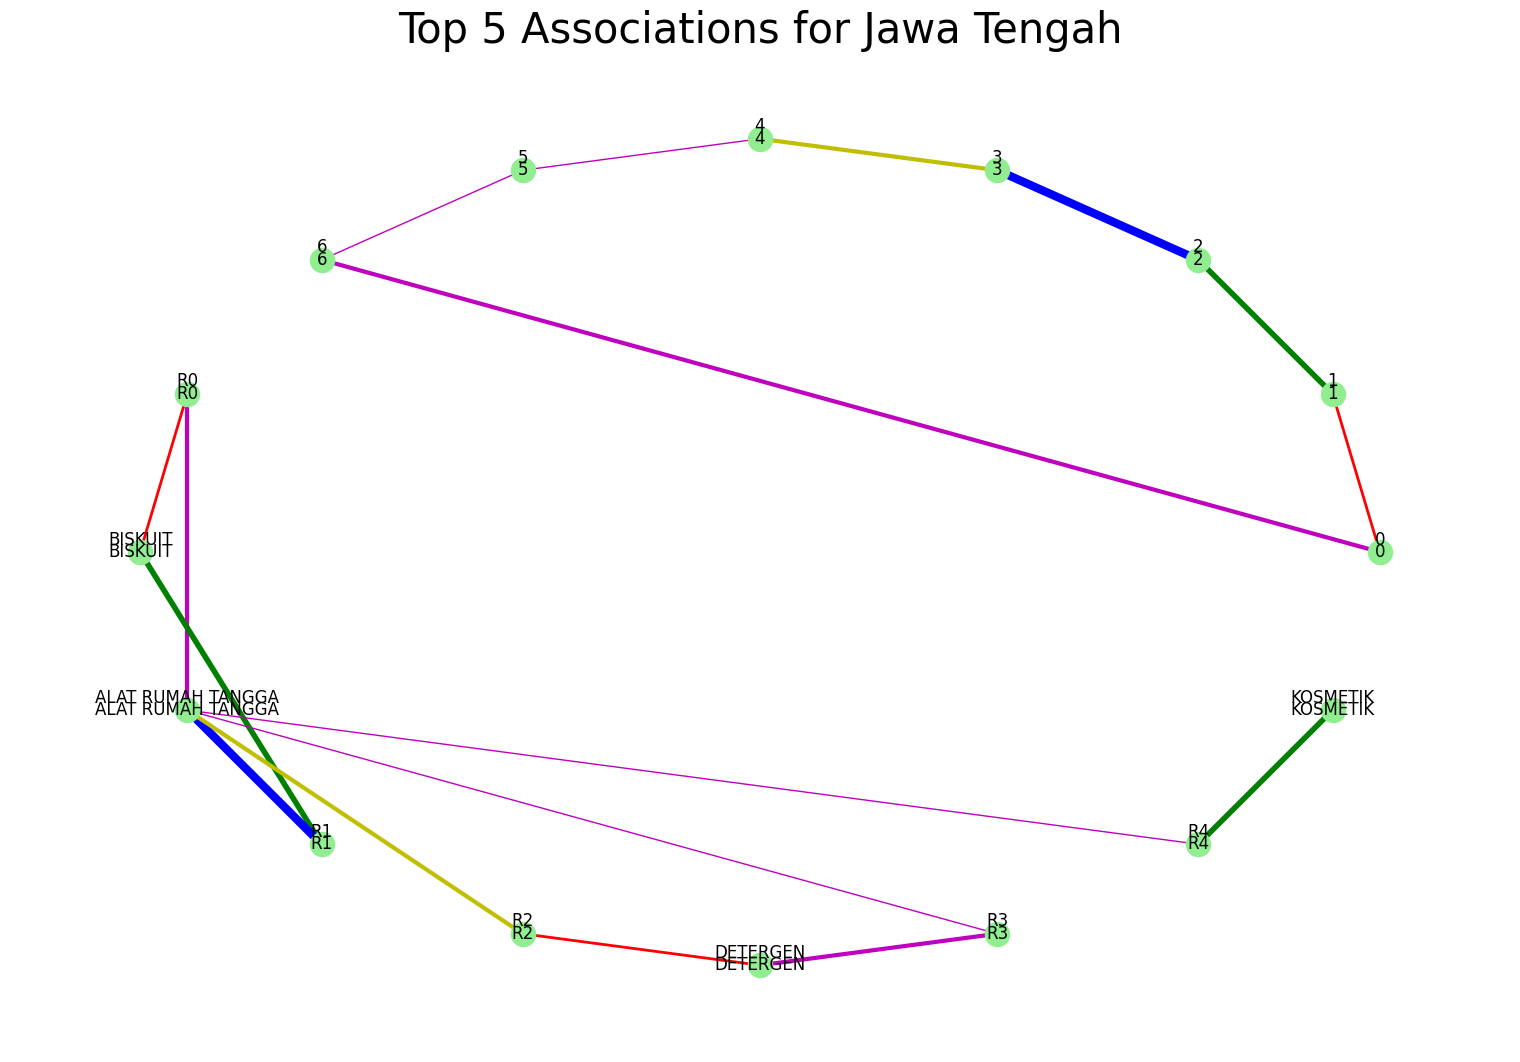

In [ ]:
draw_rules(rules1, 'Jawa Tengah')

- lihat poin, jika beli detergen akan beli alat rumah tangga
- alat rumah tangga bis abeli biskuit

## PROVINSI JAWA BARAT

In [ ]:
basket_1=(df[df['PROVINSI']=='JAWA BARAT'].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
              .unstack().reset_index().fillna(0)\
              .set_index('InvoiceNo')
        )

basket_1

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
580727,0.0,4.0,37.0,4.0,0.0,47.0,18.0,7.0,23.0,0.0,...,1.0,5.0,22.0,22.0,25.0,0.0,9.0,12.0,0.0,5.0
580728,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket_1_sets = basket.applymap(encode_units)
  # applymap = memanggil encode unique
basket_1_sets.head()


PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
frequent_1_itemsets=apriori(basket_1_sets, min_support=0.1, use_colnames=True)
frequent_1_itemsets

,support,itemsets
0,0.326438,(ALAT RUMAH TANGGA)
1,0.348726,(BISKUIT)
2,0.172516,(BUMBU)
3,0.166359,(COKELAT)
4,0.273488,(DETERGEN)
...,...,...
250,0.102204,"(SNACK, KOSMETIK, MINUMAN, SABUN & SAMPHOO)"
251,0.117473,"(SUSU, KOSMETIK, MINUMAN, SABUN & SAMPHOO)"
252,0.102081,"(KOSMETIK, OBATAN, SABUN & SAMPHOO, PARFUM)"
253,0.106760,"(SUSU, KOSMETIK, PARFUM, SABUN & SAMPHOO)"


In [ ]:
rules2= association_rules(frequent_1_itemsets, metric='lift', min_threshold=1)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISKUIT),(ALAT RUMAH TANGGA),0.348726,0.326438,0.177811,0.509887,1.561974,0.063973,1.374300
1,(ALAT RUMAH TANGGA),(BISKUIT),0.326438,0.348726,0.177811,0.544700,1.561974,0.063973,1.430430
2,(DETERGEN),(ALAT RUMAH TANGGA),0.273488,0.326438,0.140377,0.513282,1.572375,0.051100,1.383887
3,(ALAT RUMAH TANGGA),(DETERGEN),0.326438,0.273488,0.140377,0.430026,1.572375,0.051100,1.274641
4,(KOSMETIK),(ALAT RUMAH TANGGA),0.412757,0.326438,0.181997,0.440931,1.350735,0.047258,1.204792


Alat rumah tangga - biskuit
- Bisa diskon biskuit jika telah membeli alat rumah tangga setelah harga tertentu
- Tebus murah, jika beli alat rumah tangga bisa bonus biskuit

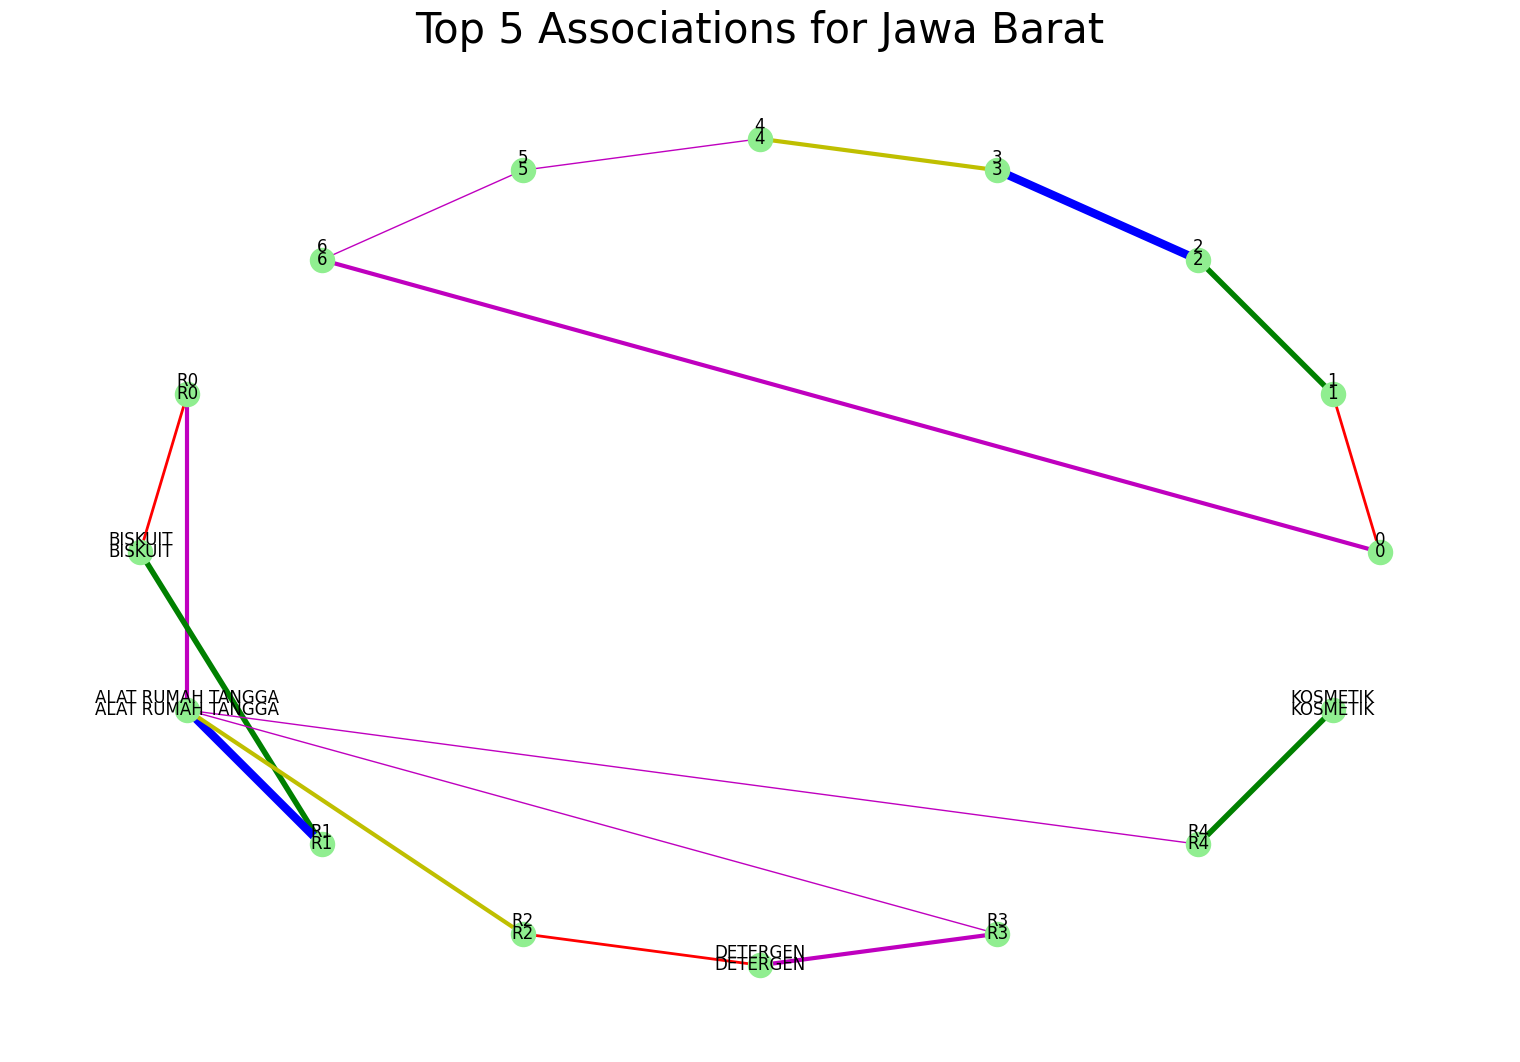

In [ ]:
draw_rules(rules2, 'Jawa Barat')